In [55]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# CODE ADAPTED FROM https://chrishavlin.com/2016/11/16/shapefiles-tutorial/

In [127]:
#https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
# "https://www2.census.gov/geo/tiger/GENZ2018/2018_file_name_def.pdf?#"

In [56]:
""" IMPORT THE SHAPEFILE """

myshp = open("cb_2018_us_county_500k/cb_2018_us_county_500k.shp", "rb")
mydbf = open("cb_2018_us_county_500k/cb_2018_us_county_500k.dbf", "rb")
myshx = open("cb_2018_us_county_500k/cb_2018_us_county_500k.shx", "rb")
sf = shapefile.Reader(shp=myshp, dbf=mydbf, shx =myshx)

myshp=open("cb_2015_us_state_20m/cb_2015_us_state_20m.shp", "rb")
sf2 = shapefile.Reader(shp= myshp)

#print( 'number of shapes imported:',len(sf.shapes()))
#print(' ')
#print( 'geometry attributes in each shape:')
#for name in dir(sf.shape()):
#    if not name.startswith('__'):
#        print(name)

In [57]:
""" PLOTS A COUNTY """
"""
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
shape_ex = sf.shape(1)
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
"""

"\nplt.figure()\nax = plt.axes()\nax.set_aspect('equal')\nshape_ex = sf.shape(1)\nx_lon = np.zeros((len(shape_ex.points),1))\ny_lat = np.zeros((len(shape_ex.points),1))\nfor ip in range(len(shape_ex.points)):\n    x_lon[ip] = shape_ex.points[ip][0]\n    y_lat[ip] = shape_ex.points[ip][1]\n\nplt.plot(x_lon,y_lat,'k')\n\n# use bbox (bounding box) to set plot limits\nplt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])\n"

In [58]:
"""Subsets Counties"""
countylist = []
indexlist=[]
for i in range(len(sf)):
    s = sf.shape(i).bbox
    if (s[0]>-126 and s[0]<-114 and s[1]>32 and s[1]<43):
        if(not(s[0]>-120 and s[1]>38)):
            countylist.append(sf.shape(i))
            indexlist.append(i)

shapes = list(sf2.iterShapes())
californiaBoundary = shapes[1]

subsetCounties=[]
#print(len(countylist))

nopelist = [13,14,17,28,33,41,52,53,54,56,57,61,62,63,64,65,66,68,75,77]
stepthrough = 55
for i in range(len(countylist)):
    if(i not in nopelist):
        subsetCounties.append(countylist[i])
subsetCounties.append(californiaBoundary)

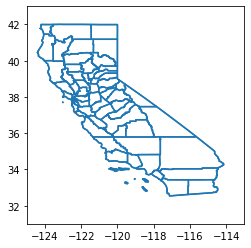

In [59]:
""" PLOTS COUNTY AND STATE BOUNDARIES"""
""" Example plot code"""  
a_region_boundaries=[]
county_state_boundaries = []

plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')
modulus = 1 # helps produce dataset of size 1/modulus 

shapes = subsetCounties[0:59] #selects which counties in california to display. California outline is #58
for shape in shapes:
    npoints = len(shape.points) # total points
    nparts = len(shape.parts) # total parts
    a_region_boundaries = []

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            if(ip%modulus==0):
                x_lon[ip] = shape.points[ip][0]
                y_lat[ip] = shape.points[ip][1]
        a_region_boundaries.append(x_lon)
        a_region_boundaries.append(y_lat)
        plt.plot(x_lon,y_lat, 'tab:blue')

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                if(ip%modulus==0):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]
            a_region_boundaries.append(x_lon)
            a_region_boundaries.append(y_lat)

            plt.plot(x_lon,y_lat,'tab:blue') 

    county_state_boundaries.append(a_region_boundaries)

plt.xlim(-125,-113)
plt.ylim(31,43)
plt.show()

In [60]:
filename = "California County and State Boundaries.csv"
f= open(filename, "w")

counter=0
f.write("county, entry number, lat/long\n")#header/column names
region = a_region_boundaries
for index, region in enumerate(county_state_boundaries):
    for num, entry in enumerate(region):
        entryNum=int(num/2)
        f.write(str(index))
        f.write(",")
        f.write(str(entryNum))
        f.write(",")
        if(counter%2==0):
            f.write("longitude,")
        else:
            f.write("latitude,")
        for coord in entry:
            for i in coord:
                #print(i, "beep")
                f.write(str(i))
                f.write(", ")
        f.write("\n")
        counter +=1
#f.write("county number ")
#f.write(str(index))
#f.write("\n")

f.close()

In [64]:
filename= "California Perimeter Boundaries.csv"
f = open(filename, "w")
california = county_state_boundaries[-1]
f.write("entry number, lat/long\n")#header/column names
for num, entry in enumerate(california):
    entryNum=int(num/2)
    f.write(str(entryNum))
    f.write(",")
    if(counter%2==0):
        f.write("longitude,")
    else:
        f.write("latitude,")
    for coord in entry:
        for i in coord:
            #print(i, "beep")
            f.write(str(i))
            f.write(", ")
    f.write("\n")
    counter +=1


In [90]:
#print(type(county_state_boundaries[-1][0][0][0]))
#print(county_state_boundaries[-1][0][0][0])

index = 0
california_boundaries_parts= [np.empty([10,2]), np.empty([9,2]), np.empty([7,2]), np.empty([17,2]), np.empty([13,2]), np.empty([412,2])]
#entryNum=0
i=0

for rowNum, row in enumerate(county_state_boundaries[-1]): #gets rows of lat & long for each part of california

    j=int(i)
    entryNum=0
    if(rowNum%2==0):
        for entryNumLat, entry in enumerate(row): # gets numpy array containing data
            #print("entryNumLat", entryNumLat)
            #print("i",i)
            #print("j",j)
            california_boundaries_parts[j][entryNumLat,1] = entry[0] #column 1 is Latitude
            entryNumLatitude+=1

    else:
        for entryNumLong, entry in enumerate(row): # gets numpy array containing data
            #print("entryNumLong", entryNumLong)
            #print("i",i)
            #print("j",j)
            california_boundaries_parts[j][entryNumLong,0] = entry[0] #column 0 is Longitude
            entryNumLongitude+=1
    i+=0.5    

<class 'numpy.float64'>
-118.593969
12


In [103]:
#print(california_boundaries_parts[5][:,:])

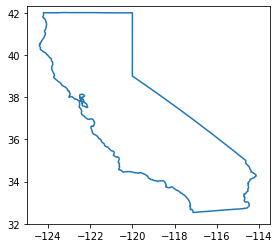

In [112]:
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')
plt.plot(california_boundaries_parts[5][:,1],california_boundaries_parts[5][:,0], 'tab:blue')
plt.xlim(-125,-113.5)
plt.ylim(32.,42.3)
plt.show()

In [104]:
print("Max Latitude", max(california_boundaries_parts[5][:,0]))
print("Min Latitude", min(california_boundaries_parts[5][:,0]))
print("Max Longitude", max(california_boundaries_parts[5][:,1]))
print("Min Latitude", min(california_boundaries_parts[5][:,1]))

Max Latitude 42.009246999999995
Min Latitude 32.534155999999996
Max Longitude -114.139055
Min Latitude -124.409591


In [122]:
california_mainland_boundaries = california_boundaries_parts[5]
filename="California_Mainland_Boundaries.csv"
f = open(filename,"w")

for row in california_mainland_boundaries:
    f.write("%f, %f \n"%(row[0],row[1]))

f.close()

In [126]:
#prints california island boundaries each to their own file
for i in range(5):
    california_island_boundaries = california_boundaries_parts[i]
    filename="California_Island_Boundaries_%s.csv"%(i)
    f = open(filename,"w")

    for row in california_island_boundaries:
        f.write("%f, %f \n"%(row[0],row[1]))

    f.close()